In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Load the image

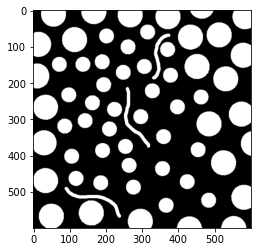

In [76]:
circles_img = cv2.imread('circles.png', 0)
plt.imshow(circles_img, cmap='gray', vmin=circles_img.min(), vmax=circles_img.max())

### 2. Perform extraction of connected components

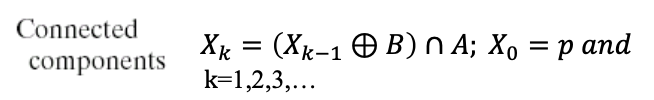

In [77]:
def dilation(img, elem_size):
    component = np.ones((elem_size, elem_size), np.uint8)
    return cv2.dilate(img, component)

def erosion(img, elem_size):
    component = np.ones((elem_size, elem_size), np.uint8)
    return cv2.erode(img, component)

In [78]:
def extract_connected_comps(img, p, d):
    X = np.zeros(img.shape, dtype=img.dtype)
    X[p[0], p[1]] = img[p[0], p[1]]
    while(True):
        dilated_X = dilation(X, d)
        img_bwa = cv2.bitwise_and(dilated_X,img)
        if np.array_equal(img_bwa, X):
            break
        X = img_bwa
    return X

In [79]:
# define coordinates of the lines
p1, p2, p3 = (500, 100), (350, 300), (160, 350)

In [80]:
# remove all lines
for p in [p1, p2, p3]:
    X = extract_connected_comps(circles_img, p, 3)
    circles_img = circles_img - X

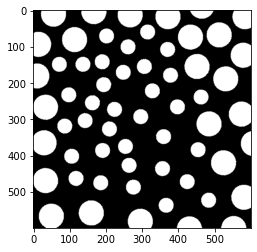

In [81]:
plt.imshow(circles_img, cmap='gray', vmin=circles_img.min(), vmax=circles_img.max())

### 3. Perform textural segmentation

In [97]:
def morphologic_openning(img, r):
    comp = np.fromfunction(lambda x, y: (x-r)**2 + (y-r)**2 <= r**2, (2*r+1, 2*r+1))
    comp = np.array(comp, dtype=np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, comp)

def morphologic_closing(img, r):
    comp = np.fromfunction(lambda x, y: (x-r)**2+(y-r)**2 <= r**2, (2*r+1, 2*r+1))
    comp = np.array(comp, dtype=np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, comp)

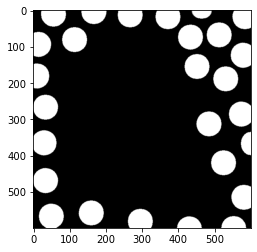

In [98]:
blobs_removed = morphologic_openning(circles_img, 22)
plt.imshow(blobs_removed, cmap='gray', vmin=0, vmax=255)

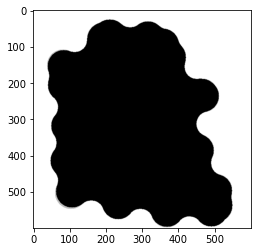

In [84]:
blobs_connected = morphologic_closing(blobs_removed, 44)
plt.imshow(blobs_connected, cmap='gray', vmin=0, vmax=255)

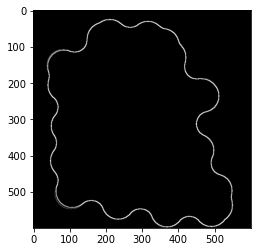

In [85]:
boundary_img = dilation(blobs_connected, 3) - erosion(blobs_connected, 3)
plt.imshow(boundary_img, cmap='gray', vmin=0, vmax=255)

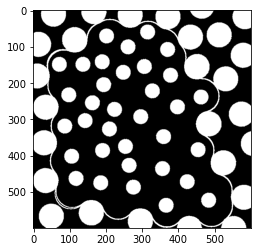

In [87]:
new_circles_img = np.copy(circles_img)
new_circles_img[boundary_img > 0] = 255
plt.imshow(new_circles_img, cmap='gray', vmin=0, vmax=255)

### 4. Extract boundaries

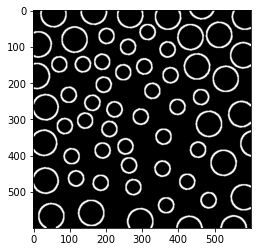

In [96]:
boundary_img = dilation(circles_img, 5) - erosion(circles_img, 5)
plt.imshow(boundary_img, cmap='gray', vmin=0, vmax=255)